# Monte Carlo & Hard disks

In this worksheet we will consider a 2D system composed of $N$ *hard disks* enclosed in a square cell of size $L = 10\sigma$, where $\sigma$ is an arbitraty unit of length used in the simulation core.
The system has a fixed volume (or rather area), temperature, and the number of particles, hence we will work in the formalism of canonical ensemble.

An alternative way of looking at a hard disk, is to describe it as a point particle described by a parameter $d = 1 \sigma$, which can be perceived as a diameter of the disk. 
Two of such point particles at distance $r$ interact with the interaction potential, $U(r)$: 

$U(r) = +\infty\ $ for $\ r < d \quad$ and $\quad U(r) = 0\ $ for $\ r \geq d$,

which is equivalent to saying, that disks can not overlap, but otherwise they are free to explore the configuration space.
Moreover, we know that the probability of realization of a given state $(\textbf{r}_1, \textbf{r}_2, \dots, \textbf{r}_N)$ is proportional to the Boltzmann factor $\sim \exp(-\beta U(\textbf{r}_1, \textbf{r}_2, \dots, \textbf{r}_N))$.
Let us assume that the potential energy can be expressed as a sum of pair potentials:

$U(\textbf{r}_1, \textbf{r}_2, \dots, \textbf{r}_N) = \sum_{ij}' U(\textbf{r}_i,\textbf{r}_j) = \sum_{ij}' U(r_{ij}).$

Now we see, that the if there is any overlap between any two disks, the corresponding Boltzmann factor is $0$, hence such a state can never happen.
Only states with no overlap have non-zero probability of realization, and this probability is the same for all of them, since energy is equal for all of them.

# Trial moves

In order to carry out a Metropolis Monte Carlo sampling, we first need a prescription to generate trial configurations, which will be then rejected or accepted.

A very straightforward way would be just to place $N$ particles in the system independently, drawing their coordinates from the uniform distribution - we will call this approach *static scheme*.
The downside of this approach, however, is that if $N$ is large, placing the particles completely randomly will almost inevitably result in overlaps, which will be rejected by Metropolis algorithm (the probability of their realization is zero).

For the above reason, we also propose *dynamic scheme* with the following idea: if we already have a configuration with no overlaps, it should be easy to generate a new one just by slightly disturbing the current one.
In this dynamic scheme, we will randomly choose just a single particle and move it with a small random displacement to create a trial to be rejected or accepted by the Metropolis algorithm.

In [1]:
import time # timing the simulation
import numpy as np # numerical operations
import matplotlib.pyplot as plt # visualization
from IPython.display import clear_output # animations
from HardDisks import * # simulation core

In [2]:
# parameters
N_part = 10 # number of particles, 1 < N < 81
max_displacement = 0.10 # Monte Carlo displacement 0 < x < 10     
mc_move = mc_move_static # trial move schemes: 'mc_move_dynamic' or 'mc_move_static'

N_moves = 5000 # number of MC steps
stride_vis = 100 # period of visualization

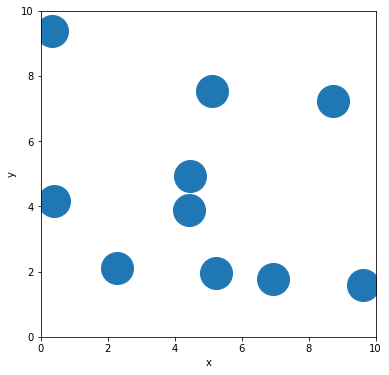

step 5000 out of 5000 (100.00%)
accepted: 1091
rejected: 3909
acceptance rate: 0.218
walltime: 0 min : 3 s


In [4]:
t0 = time.perf_counter()
# initialize the lattice
x_grid = np.linspace(0, L_box, num = int(L_box))[:(int(L_box)-1)]
y_grid = np.copy(x_grid)
X_g, Y_g = np.meshgrid(x_grid, y_grid)
# now take the N_part points from there
xy = np.array([X_g.flatten(),Y_g.flatten()]).T[:N_part,:]
accepted = 0

# loop over all steps
for step in range(N_moves + 1):
    flag, xy = mc_move(xy, L_box, N_part, disk_d, max_displacement) # make a move
    accepted += flag # update the buffer for the acceptance rate 
    
    # visualize
    if (step % stride_vis == 0):
        clear_output(wait=True)
        plt.figure(figsize = (6,6))
        plt.xlim(0,L_box)
        plt.ylim(0,L_box)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.plot(xy[:,0], xy[:,1], linewidth = 0, marker = 'o', markersize = 32)
        plt.show()
        print('\rstep {:d} out of {:d} ({:.2f}%)'.format(step, N_moves, step / N_moves*100 ), end = '', flush = True)
        
print()
print('accepted: {:d}'.format(accepted))
print('rejected: {:d}'.format(N_moves - accepted))
print('acceptance rate: {:.3f}'.format(accepted / N_moves))
t = int(time.perf_counter() - t0)
print('walltime: {:d} min : {:d} s'.format(t // 60, t % 60))

In [7]:
x_grid = np.linspace(0, L_box, num = int(L_box))[:(int(L_box)-1)]
print(x_grid)

[0.         1.11111111 2.22222222 3.33333333 4.44444444 5.55555556
 6.66666667 7.77777778 8.88888889]


In [8]:
x_grid = np.linspace(0, L_box, num = int(L_box))
print(x_grid)

[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]


## Tasks
1. use the `static` scheme for $N \in \{5, 10, 50\}$ and compare the acceptance rates. Is the `static` scheme more efficient for dense or dilute systems? In a proper Monte Carlo simulation, the acceptance rate should be neither too low nor too high - why?
1. use the `dynamic` scheme for $N \in \{10, 70\}$ with different maximal displacement $x \in \{ 0.1, 1.0, 5.0\}$. Visually compare how does the "memory" of the system depend on the maximal displacement. Try to plot the acceptance rate as a function of maximal displacement for each of $N$.